In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

In [ ]:
data=pd.read_excel("Test Population.xlsx")

In [ ]:
data.head()

Entity Code  Year  Population  Deaths Estimates  Birth Estimates  \
0  Afghanistan  AFG  1950     7480464            283668         365303.0   
1  Afghanistan  AFG  1951     7571542            282577         372040.0   
2  Afghanistan  AFG  1952     7667534            280803         378290.0   
3  Afghanistan  AFG  1953     7764549            279684         384933.0   
4  Afghanistan  AFG  1954     7864289            280476         390412.0   

   Male population  Female population     Age 1  Age 1 to 4  ...  \
0          3962270            3518204  301735.0    946547.0  ...   
1          4001607            3569934  299368.0    947489.0  ...   
2          4043308            3624223  305393.0    942827.0  ...   
3          4085498            3679048  311574.0    943151.0  ...   
4          4129202            3735087  317584.0    950233.0  ...   

   Age 15 to 19  Age 20 to 29  Age 30 to 39  Age 40 to 49  Age 50 to 59  \
0        757113       1241348        909953        661807        467170   
1        768616       1260904        922765        667015        468881   
2        781411       1280288        935638        672491        470898   
3        794308       1298803        948321        678064        472969   
4        806216       1316768        961484        684153        475117   

   Age 60 to 69  Age 70 to 79  Age 80 to 89  Age 90 to 99  Age more than 100  
0        271905         92691          9499           123                0.0  
1        273286         94358         10155           118                0.0  
2        274852         96026         10721           139                0.0  
3        276577         97705         11254           166                0.0  
4        278210         99298         11793           190                0.0  

[5 rows x 22 columns]

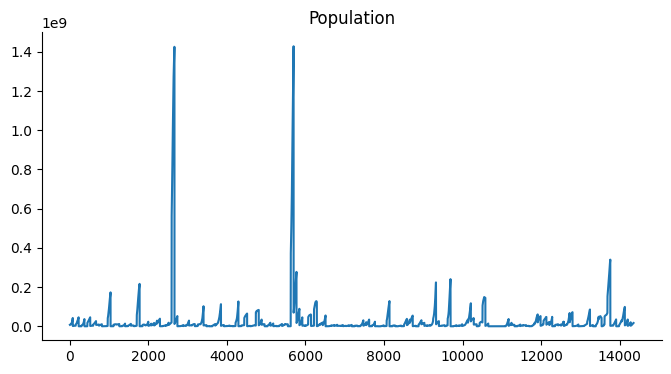

In [ ]:
# Population

from matplotlib import pyplot as plt
data['Population'].plot(kind='line', figsize=(8, 4), title='Population')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data.columns

Index(['Entity', 'Code', 'Year', 'Population'], dtype='object')

In [ ]:
pip install -U kaleido

In [ ]:
pip install moviepy


##1. Population growth trends for individual countries over me?

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Load the data (assuming 'data' is already defined or loaded as a DataFrame)
population_data = data

# Define the maximum value for the color scale
max_population = 1.4e9  # 1.4 billion

# Create choropleth map with a dropdown for year selection
fig = px.choropleth(
    population_data,
    locations="Code",
    color="Population",
    hover_name="Entity",
    animation_frame="Year",
    color_continuous_scale=[ "pink","red", "orange", "yellow", "green"],  # Custom color scale
    range_color=(0, max_population),  # Set the color scale range
    title="World Population by Country and Year",
    labels={'Population': 'Population'}
)

# Update layout
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgrey")
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})

# Save the figure as an interactive HTML file
output_file = "world_population_map.html"
pio.write_html(fig, file=output_file, auto_open=False)

# Show the figure
fig.show()


In [ ]:
# Calculate the maximum population per year
population_data['MaxPopulation'] = population_data.groupby('Year')['Population'].transform('max')

# Normalize population by scaling to a "target" population value
target_population = 1  # or set this to the actual max value you want bubbles to target
population_data['NormalizedPopulation'] = (population_data['Population'] / population_data['MaxPopulation']) * target_population

# Create the bubble chart
fig = px.scatter(
    population_data,
    x="NormalizedPopulation",   # Bubbles move closer to max value (set as target)
    y="Population",             # y-axis as actual Population
    size="Population",          # Bubble size based on Population
    color="Entity",             # Color each country differently
    animation_frame="Year",     # Year as the animation frame
    title="Population by Country Over the Years (Moving Towards Max)",
    labels={"Population": "Population", "NormalizedPopulation": "Scaled Population"}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Scaled Population (Relative to Max)",
    yaxis_title="Population",
    xaxis=dict(range=[0, target_population]),  # Set x-axis limit to target
    yaxis_type="log",                           # Log scale for large values
    showlegend=True
)

fig.show()


In [ ]:
# Filter out data for "China" and "India"
filtered_data = population_data.query("Entity != 'China' and Entity != 'India'")

# Calculate the maximum population per year within the filtered data
filtered_data['MaxPopulation'] = filtered_data.groupby('Year')['Population'].transform('max')

# Normalize population by scaling to a "target" population value
target_population = 1  # or set this to the actual max value you want bubbles to target
filtered_data['NormalizedPopulation'] = (filtered_data['Population'] / filtered_data['MaxPopulation']) * target_population

# Create the bubble chart for filtered data
fig = px.scatter(
    filtered_data,
    x="NormalizedPopulation",   # Bubbles move closer to max value (set as target)
    y="Population",             # y-axis as actual Population
    size="Population",          # Bubble size based on Population
    color="Entity",             # Color each country differently
    animation_frame="Year",     # Year as the animation frame
    title="Population by Country Over the Years (Excluding China and India)",
    labels={"Population": "Population", "NormalizedPopulation": "Scaled Population"}
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Scaled Population (Relative to Max)",
    yaxis_title="Population",
    yaxis=dict(type="log"),     # Log scale for y-axis
    showlegend=True
)

fig.show()


<ipython-input-10-0a06b541dbe7>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-0a06b541dbe7>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = "Test Population.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Ensure data is sorted by Entity and Year
data = data.sort_values(by=["Entity", "Year"])

# Clean and Convert Population Data
data["Population"] = pd.to_numeric(data["Population"], errors="coerce")  # Handle commas

# Calculate Year-on-Year Rate of Increase
data["Rate_of_Increase"] = data.groupby("Entity")["Population"].pct_change() * 100  # Percentage change

# Drop rows with missing Rate of Increase values
data = data.dropna(subset=["Rate_of_Increase"])

# Compute the average Rate of Increase per country
average_growth = data.groupby("Entity")["Rate_of_Increase"].mean().sort_values(ascending=False)

# Select the Top 5 Countries with the Highest Growth Rate
top_5_countries = average_growth.head(5).index
top_5_data = data[data["Entity"].isin(top_5_countries)]

# Plot the data for Top 5 Countries using Plotly
fig = px.line(
    top_5_data,
    x="Year",
    y="Rate_of_Increase",
    color="Entity",
    title="Top 5 Countries with Highest Rate of Population Growth",
    labels={"Rate_of_Increase": "Rate of Increase (%)"},
)

# Customize the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Rate of Increase (%)",
    legend_title="Country",
    template="plotly_white",
    title_font_size=18,
)

# Show the Plot
fig.show()


In [ ]:
data['Children'] = data[['Age 1', 'Age 1 to 4', 'Age 5 to 9', 'Age 10 to 14']].sum(axis=1)
data['Adults'] = data[['Age 15 to 19', 'Age 20 to 29', 'Age 30 to 39', 'Age 40 to 49', 'Age 50 to 59']].sum(axis=1)
data['Senior Citizens'] = data[['Age 60 to 69', 'Age 70 to 79', 'Age 80 to 89', 'Age 90 to 99', 'Age more than 100']].sum(axis=1)

# 2. Calculate the percentage for each section
data['Children_Percentage'] = (data['Children'] / data['Population']) * 100
data['Adults_Percentage'] = (data['Adults'] / data['Population']) * 100
data['SeniorCitizens_Percentage'] = (data['Senior Citizens'] / data['Population']) * 100
data.head()

Entity Code  Year  Population  Deaths Estimates  Birth Estimates  \
0  Afghanistan  AFG  1950     7480464            283668         365303.0   
1  Afghanistan  AFG  1951     7571542            282577         372040.0   
2  Afghanistan  AFG  1952     7667534            280803         378290.0   
3  Afghanistan  AFG  1953     7764549            279684         384933.0   
4  Afghanistan  AFG  1954     7864289            280476         390412.0   

   Male population  Female population     Age 1  Age 1 to 4  ...  \
0          3962270            3518204  301735.0    946547.0  ...   
1          4001607            3569934  299368.0    947489.0  ...   
2          4043308            3624223  305393.0    942827.0  ...   
3          4085498            3679048  311574.0    943151.0  ...   
4          4129202            3735087  317584.0    950233.0  ...   

   Age 70 to 79  Age 80 to 89  Age 90 to 99  Age more than 100   Children  \
0         92691          9499           123                0.0  3068855.0   
1         94358         10155           118                0.0  3105444.0   
2         96026         10721           139                0.0  3145070.0   
3         97705         11254           166                0.0  3186382.0   
4         99298         11793           190                0.0  3231060.0   

    Adults  Senior Citizens  Children_Percentage  Adults_Percentage  \
0  4037391         374218.0            41.024928          53.972467   
1  4088181         377917.0            41.014684          53.994035   
2  4140726         381738.0            41.018012          54.003360   
3  4192465         385702.0            41.037567          53.994958   
4  4243738         389491.0            41.085214          53.962132   

   SeniorCitizens_Percentage  
0                   5.002604  
1                   4.991282  
2                   4.978628  
3                   4.967475  
4                   4.952654  

[5 rows x 28 columns]

In [ ]:
data.to_csv("aggre_data.csv")

##2. How are the country population divided and how are these individual division dominance effect the country at its level?

In [ ]:
#Monaco Highest senior citizen percentage and lowest children percentage
# 58,14,28 adults, children and seniors(Highest) respectively similar countries swedan, UK

#Qatar 71,27,2 adults (Highest), children, seniors(second lowest) similar countries UAE, singapore

#Niger 49,48,3 adults, children(Highest), seniors similar countries palestine, marshall islands

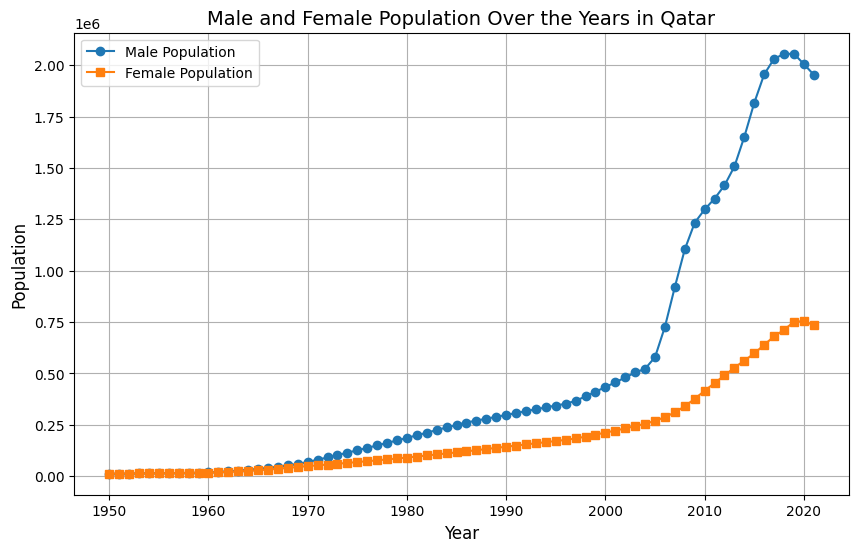

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = "Test Population.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Filter data for the entity "Qatar"
qatar_data = df[df['Entity'].str.lower() == 'qatar']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(qatar_data['Year'], qatar_data['Male population'], label='Male Population', marker='o')
plt.plot(qatar_data['Year'], qatar_data['Female population'], label='Female Population', marker='s')

# Add titles and labels
plt.title("Male and Female Population Over the Years in Qatar", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
output_file = "qatar_population_chart.png"
plt.savefig(output_file, dpi=300, bbox_inches='tight')


In [ ]:
# Filter data for selected countries
filtered_data = data[data['Entity'].isin(['Monaco', 'Qatar', 'Niger'])]

# Melt data for easier plotting with Plotly
melted_data = filtered_data.melt(id_vars=['Entity', 'Year'],
                                 value_vars=['Children_Percentage', 'Adults_Percentage', 'SeniorCitizens_Percentage'],
                                 var_name='Age_Group', value_name='Percentage')

# Rename the age groups for better readability
age_group_mapping = {
    'Children_Percentage': 'Children',
    'Adults_Percentage': 'Adults',
    'SeniorCitizens_Percentage': 'Senior Citizens'
}
melted_data['Age_Group'] = melted_data['Age_Group'].map(age_group_mapping)

# Define consistent colors for each age group
color_discrete_map = {
    'Children': 'blue',
    'Adults': 'green',
    'Senior Citizens': 'red'
}

# Plot with Plotly Express
fig = px.line(
    melted_data,
    x='Year',
    y='Percentage',
    color='Age_Group',
    line_dash='Entity',   # Different dash styles for each country
    facet_col='Entity',   # Separate subplot for each country
    title="Age Group Percentage Trends for Monaco, Qatar, and Niger",
    labels={"Percentage": "Percentage of Population", "Age_Group": "Age Group"},
    color_discrete_map=color_discrete_map  # Apply color mapping
)

# Customize layout for readability
fig.update_layout(yaxis=dict(range=[0, 100]), title_x=0.5)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Melt data for easier plotting with Plotly
melted_data = data.melt(id_vars=['Entity', 'Year'],
                        value_vars=['Children_Percentage', 'Adults_Percentage', 'SeniorCitizens_Percentage'],
                        var_name='Age_Group', value_name='Percentage')

# Rename the age groups for better readability
age_group_mapping = {
    'Children_Percentage': 'Children',
    'Adults_Percentage': 'Adults',
    'SeniorCitizens_Percentage': 'Senior Citizens'
}
melted_data['Age_Group'] = melted_data['Age_Group'].map(age_group_mapping)

# Define consistent colors for each age group
color_discrete_map = {
    'Children': 'blue',
    'Adults': 'green',
    'Senior Citizens': 'red'
}

# Function to create plot for a specific country
def plot_country(country_name):
    country_data = melted_data[melted_data['Entity'] == country_name]
    fig = px.line(
        country_data,
        x='Year',
        y='Percentage',
        color='Age_Group',
        title=f"Age Group Percentage Trends for {country_name}",
        labels={"Percentage": "Percentage of Population", "Age_Group": "Age Group"},
        color_discrete_map=color_discrete_map
    )
    fig.update_layout(yaxis=dict(range=[0, 100]), title_x=0.5)
    fig.show()

# Plot for each country
plot_country('Monaco')



In [ ]:
plot_country('Qatar')


In [ ]:
plot_country('Niger')

In [ ]:
import pandas as pd

# Load the Excel file
file_path = 'Test Population.xlsx'
data = pd.read_excel(file_path)


# Compute summary statistics for quantitative variables
summary_stats = data.describe()

# Display the summary statistics
print(summary_stats)


               Year    Population  Deaths Estimates  Birth Estimates  \
count  13968.000000  1.396800e+04      1.396800e+04     1.396800e+04   
mean    1985.500000  2.565453e+07      2.606959e+05     6.498228e+05   
std       20.783349  1.036462e+08      9.953798e+05     2.465913e+06   
min     1950.000000  3.374000e+03      5.000000e+01     8.200000e+01   
25%     1967.750000  1.006752e+06      1.069550e+04     2.702225e+04   
50%     1985.500000  4.739304e+06      5.456550e+04     1.223060e+05   
75%     2003.250000  1.485373e+07      1.659540e+05     4.522492e+05   
max     2021.000000  1.425894e+09      1.961344e+07     3.356734e+07   

       Male population  Female population         Age 1    Age 1 to 4  \
count     1.396800e+04       1.396800e+04  1.396800e+04  1.396800e+04   
mean      1.287557e+07       1.277897e+07  6.137324e+05  2.299497e+06   
std       5.303416e+07       5.062623e+07  2.323663e+06  8.795739e+06   
min       1.703000e+03       1.629000e+03  8.500000e+01  3.